In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.collections import LineCollection
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40., 7.)
matplotlib.rcParams.update({'font.size': 22})

%load_ext autoreload
%autoreload 2

from Database import *
from Densities import *
from MultiIndex import *
from Surrogates import *
from Transport import *

import plotutil, randutil

def plot_density(ax, t, n=200, alpha=1, cmap='viridis') :
    x = np.linspace(-1,1,n)
    X, Y = np.meshgrid(x, x)
    pts = np.vstack((X.flatten(), Y.flatten()))
    Ztar = np.ones((len(x), len(x)))
    if t is not None :
        Ztar = t.eval(pts).reshape((len(x), len(x)))
    ax.contourf(-X, -Y, Ztar.T, cmap=cmap, alpha=alpha)

def plot_grid(x, y, ax, **kwargs):
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()
    
def get_ax_clean(fig, nx=1, ny=1, n=1) :
    ax = fig.add_subplot(ny,nx,n)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_aspect('equal', 'box')
    return ax

In [5]:
#t = Gaussian(mean=np.array([[-0.29], [0.10]]), cova=np.array([[0.01714955, 0.0176695], [0.0176695, .02852501]]))
t = Rosenbrock(a=.2, b=8, theta=-2*np.pi/7, centr=np.array([.5,-.5]), scale=1.1)
m = TotalDegreeSet(dim=2, order=16)
s = Legendre(multis=m, target=t, method='wls')
r = TransportMap(s)

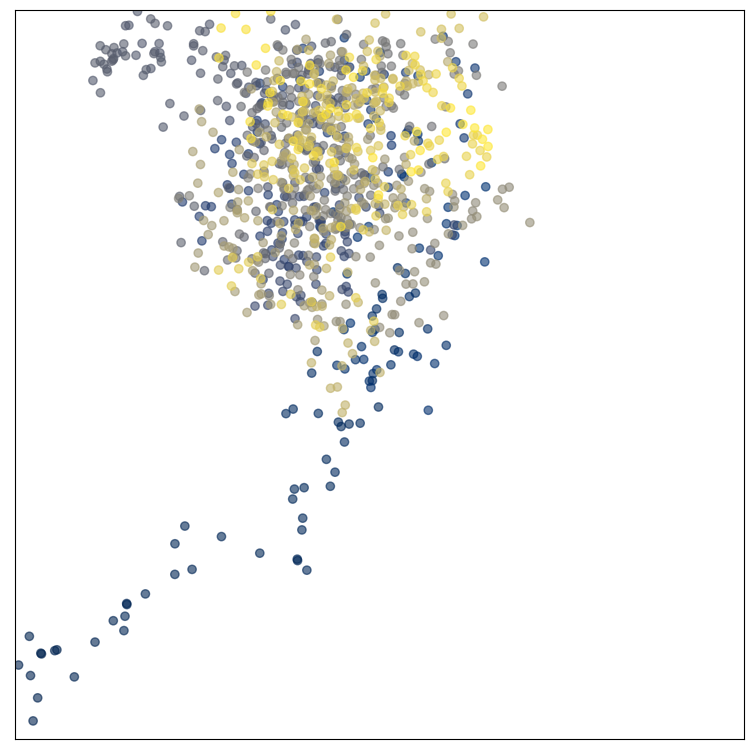

In [65]:
rng = np.random.default_rng()
n = 1000
samples = np.zeros((n,2))
samples[0,:] = [.95,.95]
cov = np.eye(2)*.005
i = 1
while i < n :
    cand = np.array([rng.multivariate_normal(mean=samples[i-1,:].T ,cov=cov)]).T
    if (cand >= -1).all() and (cand <= 1).all() :
        accp = t.eval(cand)/t.eval(np.array([samples[i-1,:]]).T)
        if rng.random() <= accp :
            samples[i,:] = cand[:,0]
            i += 1
            
m = 1
fig = plt.figure(figsize=(m*8,8))
ax = get_ax_clean(fig, nx=m, n=1); ax.scatter(-samples[:,1], -samples[:,0], alpha=.6, c=np.arange(n),cmap='cividis')
plt.tight_layout()
plt.savefig('/home/uq/notes/slides/221119 Prag/figures/mcmc_mixture.pdf', format='pdf')
plt.show()

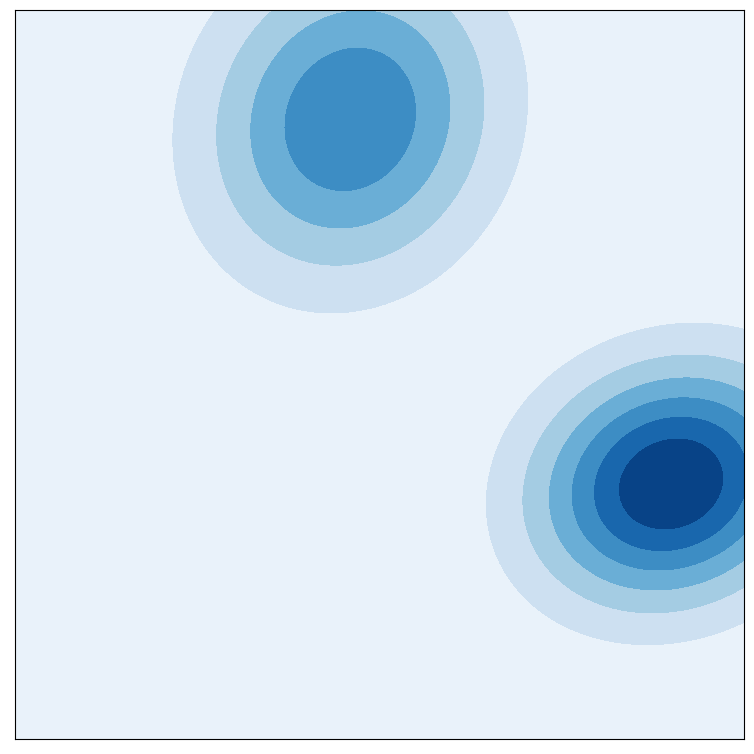

In [53]:
d = 2
import randutil as rd
arglist = [{'mean': np.array([[ 0.3], [-0.8]]), 'cova': np.array([[0.05, 0.0074], [0.0074, 0.066]])},
 {'mean': np.array([[-0.7], [ 0.08]]),
  'cova': np.array([[0.0878157 , 0.00863318], [0.00863318, 0.07382178]])}]
t = GaussianMixture(dim=d, arglist=arglist)

m = 1
fig = plt.figure(figsize=(m*8,8))
ax = get_ax_clean(fig, nx=m, n=1);  plot_density(ax, t, cmap='Blues')
plt.tight_layout()
plt.savefig('/home/uq/notes/slides/221119 Prag/figures/mcmc_mixture_dens.pdf', format='pdf')
plt.show()